<a href="https://colab.research.google.com/github/aws3ma/deep-learning/blob/main/Atelier_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_conf_matrix(y_pred,y_test):
  import numpy as np
  import seaborn as sn
  import matplotlib.pyplot as plt
  y_prediction_labels = [np.argmax(i) for i in y_pred]
  y_test_labels = [np.argmax(i) for i in y_test]
  cm = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_prediction_labels)
  plt.figure(figsize = (10,10))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

In [26]:
def plot_accuracy_and_loss(history):
  import matplotlib.pyplot as plt
  fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_title("Model accuracy")
  ax1.set_ylabel("Accuracy")
  ax1.set_xlabel("Epochs")
  ax1.legend(['train','validation'],loc='lower right')

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title("Model loss")
  ax2.set_ylabel("Loss")
  ax2.set_xlabel("Epochs")
  ax2.legend(['train','validation'],loc='upper right')
  fig.show()

In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
x_train = x_train.reshape(60000,784)

In [10]:
x_test = x_test.reshape(10000,784)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
x_train /=255
x_test /=255 

In [13]:
nb_classes = 10
print("Dimension avant one_hot_encoder", y_train.shape)

Dimension avant one_hot_encoder (60000,)


In [14]:
y_train = to_categorical(y_train,nb_classes)
y_test = to_categorical(y_test,nb_classes)

In [15]:
print('Dimension apres one-hot encoder', y_train.shape)

Dimension apres one-hot encoder (60000, 10)


In [ ]:
model=Sequential()
model.add(Dense(400, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(400))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [14]:
print('Dimension de X_train',x_train.shape)
print('Dimension de Y_train',y_train.shape)
print('Dimension de X_test',x_test.shape)
print('Dimension de Y_test',y_test.shape)

Dimension de X_train (60000, 784)
Dimension de Y_train (60000, 10)
Dimension de X_test (10000, 784)
Dimension de Y_test (10000, 10)


In [ ]:
history= model.fit(x_train, y_train,
                batch_size=100,
                epochs=100,
                verbose=2,
                validation_data=(x_test,y_test))

Epoch 1/100
600/600 - 10s - loss: 0.2194 - accuracy: 0.9359 - val_loss: 0.1046 - val_accuracy: 0.9656 - 10s/epoch - 17ms/step
Epoch 2/100
600/600 - 2s - loss: 0.0799 - accuracy: 0.9763 - val_loss: 0.0777 - val_accuracy: 0.9757 - 2s/epoch - 3ms/step
Epoch 3/100
600/600 - 2s - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0725 - val_accuracy: 0.9766 - 2s/epoch - 3ms/step
Epoch 4/100
600/600 - 2s - loss: 0.0384 - accuracy: 0.9873 - val_loss: 0.0736 - val_accuracy: 0.9783 - 2s/epoch - 3ms/step
Epoch 5/100
600/600 - 2s - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0693 - val_accuracy: 0.9793 - 2s/epoch - 4ms/step
Epoch 6/100
600/600 - 2s - loss: 0.0246 - accuracy: 0.9919 - val_loss: 0.0842 - val_accuracy: 0.9769 - 2s/epoch - 3ms/step
Epoch 7/100
600/600 - 2s - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0786 - val_accuracy: 0.9797 - 2s/epoch - 3ms/step
Epoch 8/100
600/600 - 2s - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0844 - val_accuracy: 0.9793 - 2s/epoch - 3ms/step
Epoch 9/100
6

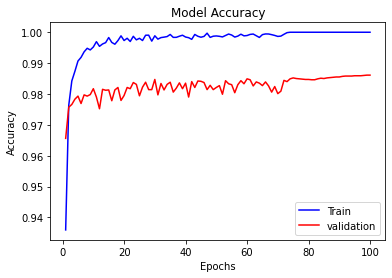

In [ ]:
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b')
plt.plot(epochs, val_acc, 'r-')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'])

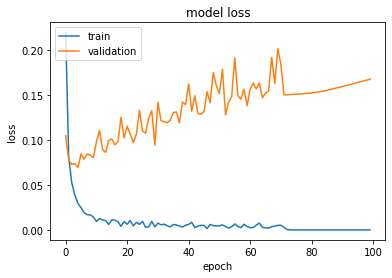

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper left')

In [ ]:
model=Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history= model.fit(x_train, y_train,
                batch_size=100,
                epochs=100,
                verbose=2,
                validation_data=(x_test,y_test))

Epoch 1/100
600/600 - 3s - loss: 0.2365 - accuracy: 0.9284 - val_loss: 0.0942 - val_accuracy: 0.9720 - 3s/epoch - 5ms/step
Epoch 2/100
600/600 - 2s - loss: 0.0997 - accuracy: 0.9689 - val_loss: 0.0772 - val_accuracy: 0.9761 - 2s/epoch - 3ms/step
Epoch 3/100
600/600 - 2s - loss: 0.0727 - accuracy: 0.9773 - val_loss: 0.0790 - val_accuracy: 0.9753 - 2s/epoch - 3ms/step
Epoch 4/100
600/600 - 2s - loss: 0.0569 - accuracy: 0.9818 - val_loss: 0.0715 - val_accuracy: 0.9775 - 2s/epoch - 3ms/step
Epoch 5/100
600/600 - 2s - loss: 0.0467 - accuracy: 0.9851 - val_loss: 0.0714 - val_accuracy: 0.9786 - 2s/epoch - 3ms/step
Epoch 6/100
600/600 - 2s - loss: 0.0428 - accuracy: 0.9860 - val_loss: 0.0699 - val_accuracy: 0.9795 - 2s/epoch - 4ms/step
Epoch 7/100
600/600 - 2s - loss: 0.0353 - accuracy: 0.9883 - val_loss: 0.0722 - val_accuracy: 0.9799 - 2s/epoch - 3ms/step
Epoch 8/100
600/600 - 2s - loss: 0.0326 - accuracy: 0.9891 - val_loss: 0.0702 - val_accuracy: 0.9809 - 2s/epoch - 3ms/step
Epoch 9/100
600/

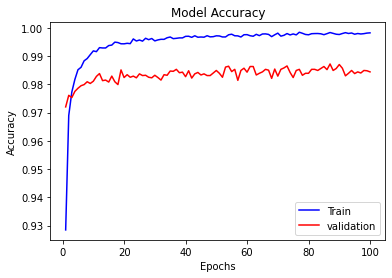

In [ ]:
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b')
plt.plot(epochs, val_acc, 'r-')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'])

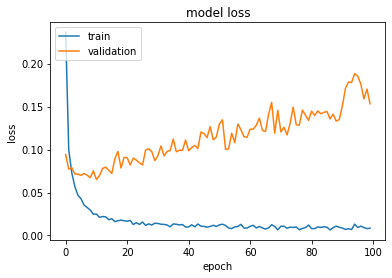

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper left')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 activation_7 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

comparer les 10 premier
crer un optimizer personnaliser
modifier dropout
optimiser le modele par le changements des hyper parametres

In [17]:
model2=Sequential()
model2.add(Dense(512, input_shape=(784,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10))
model2.add(Activation('softmax'))
adam=tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [18]:
history2 = model2.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    verbose=2,
                    validation_data=(x_test, y_test))

Epoch 1/50
469/469 - 4s - loss: 0.8930 - accuracy: 0.7276 - val_loss: 0.3102 - val_accuracy: 0.9149 - 4s/epoch - 9ms/step
Epoch 2/50
469/469 - 2s - loss: 0.3794 - accuracy: 0.8861 - val_loss: 0.2307 - val_accuracy: 0.9315 - 2s/epoch - 5ms/step
Epoch 3/50
469/469 - 2s - loss: 0.2937 - accuracy: 0.9129 - val_loss: 0.1858 - val_accuracy: 0.9445 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 0.2434 - accuracy: 0.9272 - val_loss: 0.1576 - val_accuracy: 0.9538 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.2098 - accuracy: 0.9383 - val_loss: 0.1382 - val_accuracy: 0.9581 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 2s - loss: 0.1863 - accuracy: 0.9445 - val_loss: 0.1241 - val_accuracy: 0.9614 - 2s/epoch - 4ms/step
Epoch 7/50
469/469 - 2s - loss: 0.1658 - accuracy: 0.9518 - val_loss: 0.1124 - val_accuracy: 0.9655 - 2s/epoch - 4ms/step
Epoch 8/50
469/469 - 2s - loss: 0.1532 - accuracy: 0.9549 - val_loss: 0.1047 - val_accuracy: 0.9683 - 2s/epoch - 4ms/step
Epoch 9/50
469/469 - 2s 

In [19]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0614 - accuracy: 0.9837


[0.06141490489244461, 0.9836999773979187]

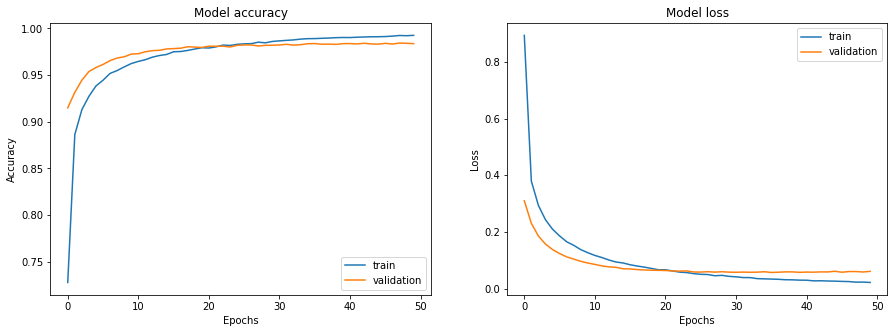

In [27]:
plot_accuracy_and_loss(history2)

1/1 [==============================] - 0s 117ms/step
Image 1: Predicted label: 7, Actual label: 7


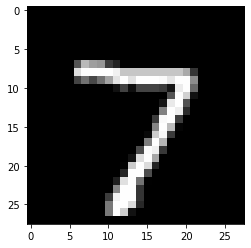

Image 2: Predicted label: 2, Actual label: 2


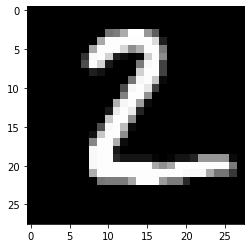

Image 3: Predicted label: 1, Actual label: 1


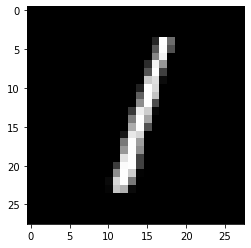

Image 4: Predicted label: 0, Actual label: 0


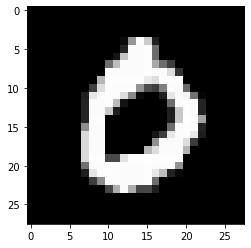

Image 5: Predicted label: 4, Actual label: 4


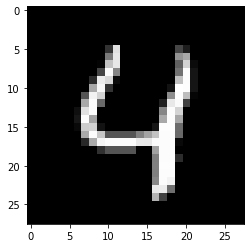

Image 6: Predicted label: 1, Actual label: 1


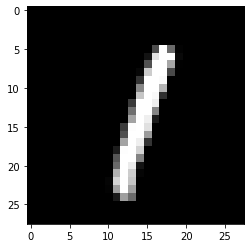

Image 7: Predicted label: 4, Actual label: 4


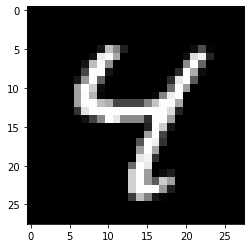

Image 8: Predicted label: 9, Actual label: 9


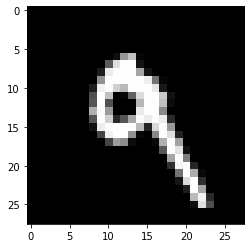

Image 9: Predicted label: 5, Actual label: 5


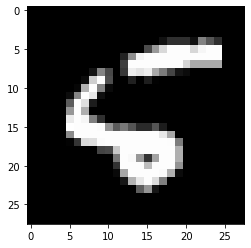

Image 10: Predicted label: 9, Actual label: 9


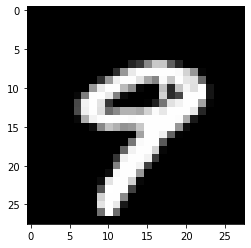

In [23]:
predictions = model2.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

for i in range(10):
    image = x_test[i].reshape(28,28)
    predicted_label = predicted_labels[i]
    actual_label = y_test[i]
    print(f"Image {i+1}: Predicted label: {predicted_label}, Actual label: {np.argmax(actual_label, axis=0)}")
    plt.imshow(image, cmap='gray')
    plt.show()

313/313 [==============================] - 1s 2ms/step


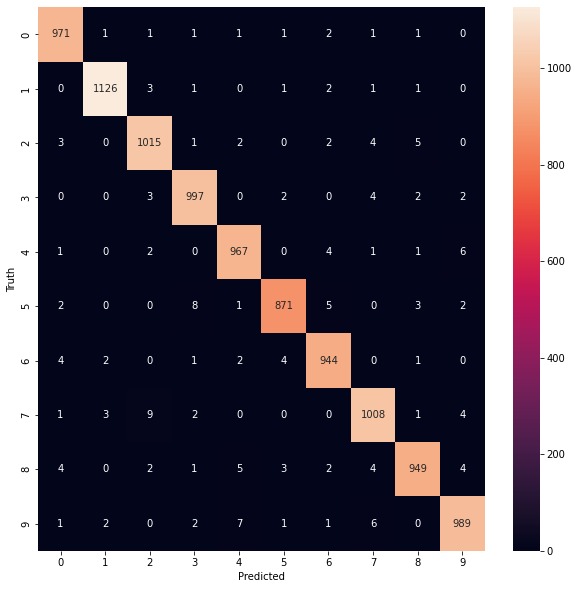

In [24]:
plot_conf_matrix(model2.predict(x_test),y_test)